##Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

##Loading Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Farmoid/crop_production.csv')
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


##Exploring Dataset

In [8]:
data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
years = data['Crop_Year'].unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [13]:
min_year = data['Crop_Year'].min()
max_year = data['Crop_Year'].max()
year_range = max_year - min_year
print(f"Range of years: {year_range} (from {min_year} to {max_year})")

Range of years: 18 (from 1997 to 2015)


In [14]:
data['Crop_Year'] = pd.to_datetime(data['Crop_Year'], format='%Y')

In [15]:
data['Season'] = data['Season'].str.strip()
data['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [16]:
crops = data['Crop'].unique()
crops

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [17]:
states = data['State_Name'].unique()
states

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [18]:
for state in states:
  print(f'{state} districts:', data.loc[data['State_Name'] == state, 'District_Name'].unique(), '\n')

Andaman and Nicobar Islands districts: ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS'] 

Andhra Pradesh districts: ['ANANTAPUR' 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA'
 'KURNOOL' 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM'
 'VIZIANAGARAM' 'WEST GODAVARI'] 

Arunachal Pradesh districts: ['ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG' 'EAST SIANG'
 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY' 'LOWER SUBANSIRI'
 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG' 'UPPER SUBANSIRI'
 'WEST KAMENG' 'WEST SIANG'] 

Assam districts: ['BAKSA' 'BARPETA' 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI'
 'DHUBRI' 'DIBRUGARH' 'DIMA HASAO' 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI'
 'JORHAT' 'KAMRUP' 'KAMRUP METRO' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR'
 'LAKHIMPUR' 'MARIGAON' 'NAGAON' 'NALBARI' 'SIVASAGAR' 'SONITPUR'
 'TINSUKIA' 'UDALGURI'] 

Bihar districts: ['ARARIA' 'ARWAL' 'AURANGABAD' 'BANKA' 'BEGUSARAI' 'BHAGALPUR' 'BHOJPUR'
 'BUXAR' 'DARBHANGA' 

##Feature Engineering

In [19]:
data['Yield_Per_Unit_Area'] = data['Production'] / data['Area']

##Exploratory Data Analysis

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   State_Name           242361 non-null  object        
 1   District_Name        242361 non-null  object        
 2   Crop_Year            242361 non-null  datetime64[ns]
 3   Season               242361 non-null  object        
 4   Crop                 242361 non-null  object        
 5   Area                 242361 non-null  float64       
 6   Production           242361 non-null  float64       
 7   Yield_Per_Unit_Area  242361 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 16.6+ MB


In [21]:
print("Summary statistics:")
data.describe()

Summary statistics:


,Crop_Year,Area,Production,Yield_Per_Unit_Area
count,242361,2.423610e+05,2.423610e+05,242361.000000
mean,2005-08-17 04:55:49.073489408,1.216741e+04,5.825034e+05,41.649059
min,1997-01-01 00:00:00,1.000000e-01,0.000000e+00,0.000000
25%,2002-01-01 00:00:00,8.700000e+01,8.800000e+01,0.513514
50%,2006-01-01 00:00:00,6.030000e+02,7.290000e+02,1.000000
75%,2010-01-01 00:00:00,4.545000e+03,7.023000e+03,2.355450
max,2015-01-01 00:00:00,8.580100e+06,1.250800e+09,88000.000000
std,NaN,5.085744e+04,1.706581e+07,817.572839


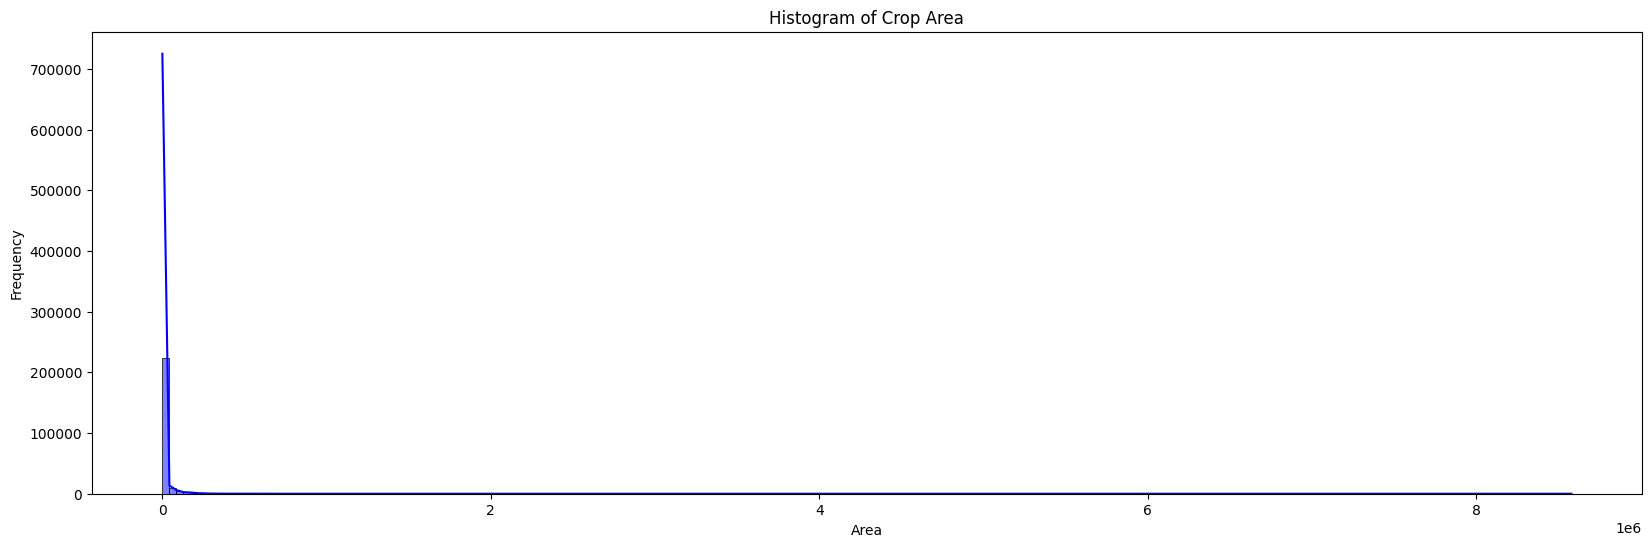

In [22]:
plt.figure(figsize=(20, 6))
sns.histplot(data['Area'], bins=200, kde=True, color='blue')
plt.title("Histogram of Crop Area")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

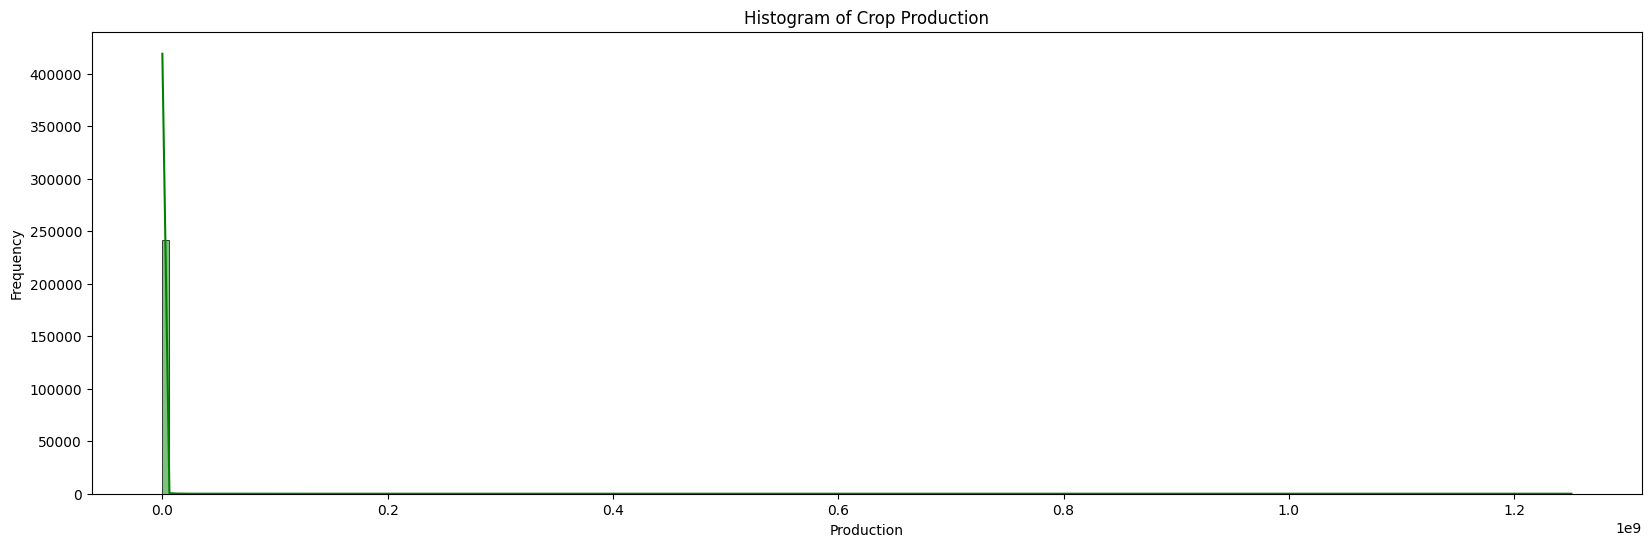

In [23]:
plt.figure(figsize=(20, 6))
sns.histplot(data['Production'], bins=200, kde=True, color='green')
plt.title("Histogram of Crop Production")
plt.xlabel("Production")
plt.ylabel("Frequency")
plt.show()

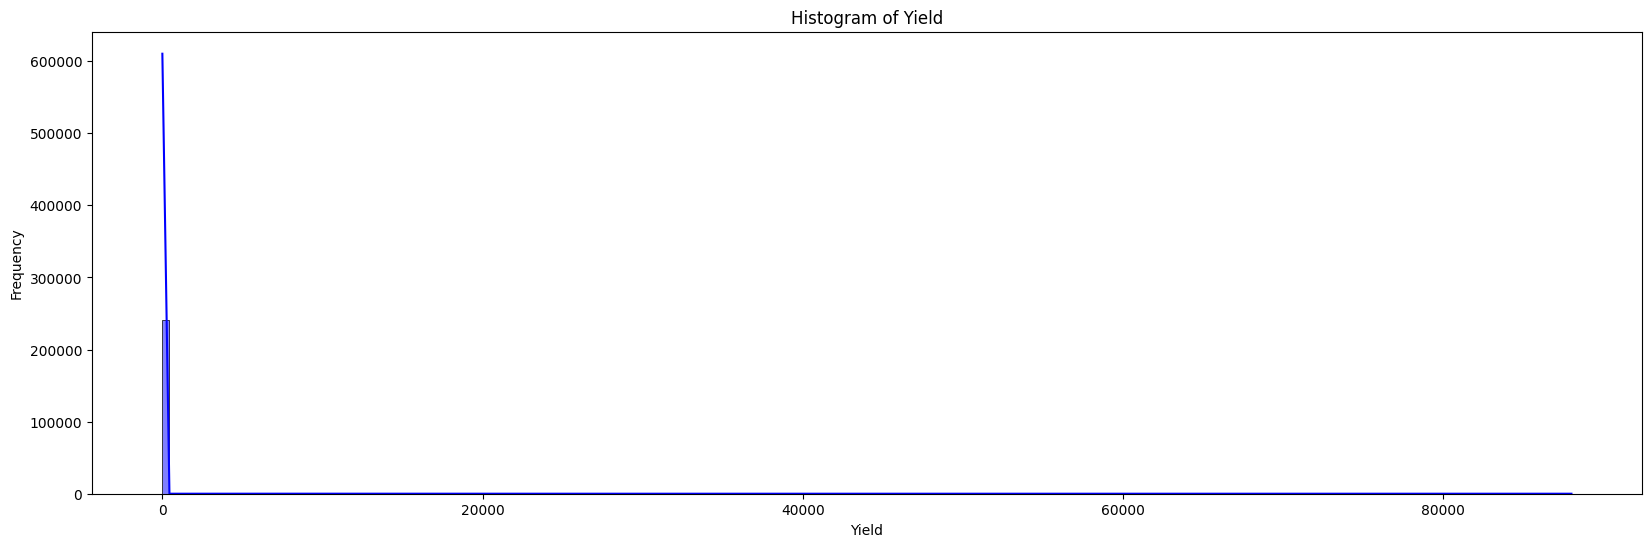

In [24]:
plt.figure(figsize=(20, 6))
sns.histplot(data['Yield_Per_Unit_Area'], bins=200, kde=True, color='blue')
plt.title("Histogram of Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

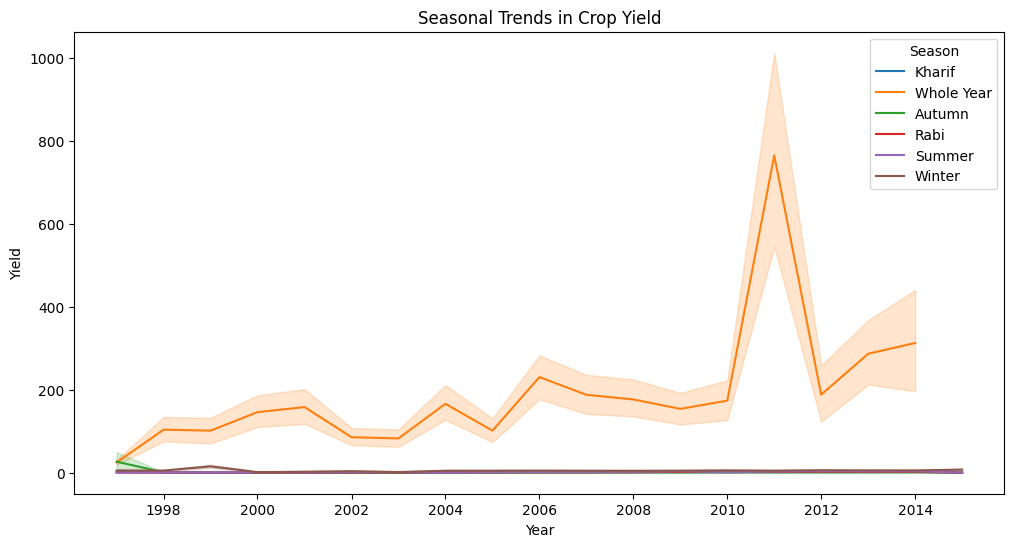

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Crop_Year', y='Yield_Per_Unit_Area', hue='Season')
plt.title("Seasonal Trends in Crop Yield")
plt.xlabel("Year")
plt.ylabel("Yield")
plt.legend(title='Season')
plt.show()

In [26]:
trend_data = data.groupby('Crop_Year').agg({'Area': 'sum', 'Production': 'sum', 'Yield_Per_Unit_Area': 'sum'}).reset_index()
trend_data

,Crop_Year,Area,Production,Yield_Per_Unit_Area
0,1997-01-01,2.317150e+08,8.512329e+08,7.700243e+04
1,1998-01-01,1.666316e+08,5.825321e+09,2.621950e+05
2,1999-01-01,1.586125e+08,6.434666e+09,3.136871e+05
3,2000-01-01,1.652898e+08,7.449709e+09,4.923061e+05
4,2001-01-01,1.652927e+08,7.465541e+09,5.180357e+05
5,2002-01-01,1.573286e+08,7.696955e+09,5.270905e+05
6,2003-01-01,1.697655e+08,7.917974e+09,5.321510e+05
7,2004-01-01,1.677566e+08,8.189462e+09,5.916140e+05
8,2005-01-01,1.629203e+08,8.043757e+09,3.538034e+05
9,2006-01-01,1.705888e+08,8.681913e+09,7.909687e+05


<Axes: xlabel='Area', ylabel='Production'>

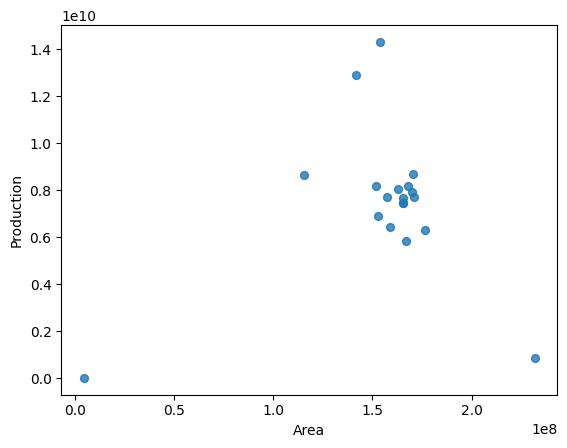

In [27]:
trend_data.plot(kind='scatter', x='Area', y='Production', s=32, alpha=.8)

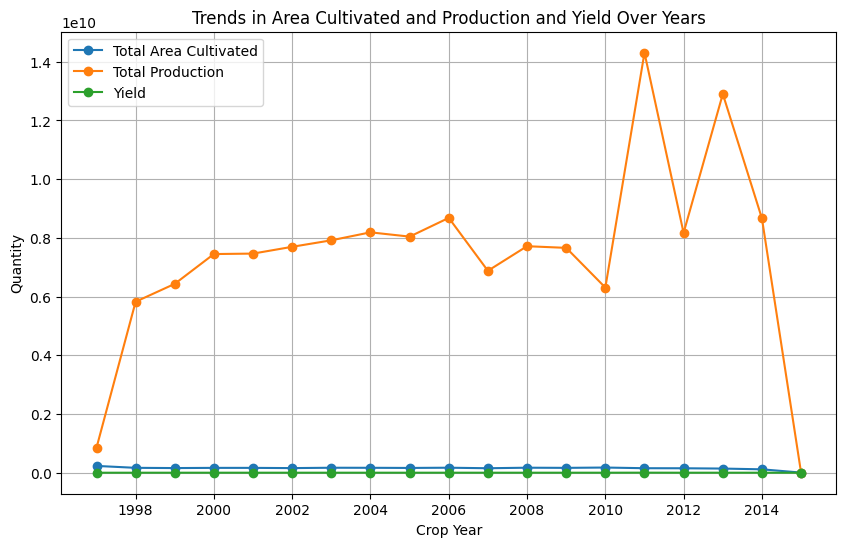

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Crop_Year'], trend_data['Area'], label='Total Area Cultivated', marker='o')
plt.plot(trend_data['Crop_Year'], trend_data['Production'], label='Total Production', marker='o')
plt.plot(trend_data['Crop_Year'], trend_data['Yield_Per_Unit_Area'], label='Yield', marker='o')
plt.xlabel('Crop Year')
plt.ylabel('Quantity')
plt.title('Trends in Area Cultivated and Production and Yield Over Years')
plt.legend()
plt.grid(True)
plt.show()

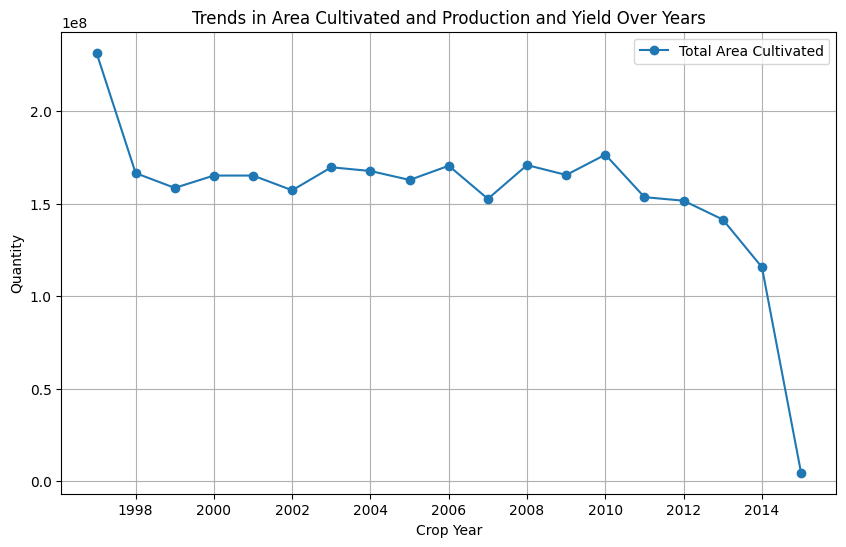

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Crop_Year'], trend_data['Area'], label='Total Area Cultivated', marker='o')
plt.xlabel('Crop Year')
plt.ylabel('Quantity')
plt.title('Trends in Area Cultivated and Production and Yield Over Years')
plt.legend()
plt.grid(True)
plt.show()

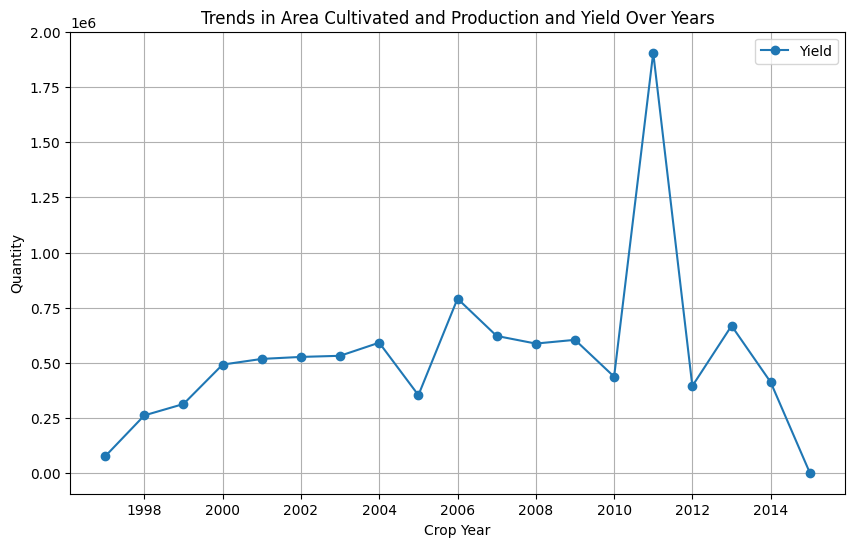

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Crop_Year'], trend_data['Yield_Per_Unit_Area'], label='Yield', marker='o')
plt.xlabel('Crop Year')
plt.ylabel('Quantity')
plt.title('Trends in Area Cultivated and Production and Yield Over Years')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
seasonal_data = data.groupby('Season').agg({'Area': 'sum', 'Production': 'sum', 'Yield_Per_Unit_Area': 'sum'}).reset_index()
seasonal_data

,Season,Area,Production,Yield_Per_Unit_Area
0,Autumn,4.806909e+07,6.441377e+07,1.342325e+04
1,Kharif,1.403367e+09,4.029970e+09,2.168534e+05
2,Rabi,9.479091e+08,2.051688e+09,1.344409e+05
3,Summer,7.531411e+07,1.706579e+08,4.162559e+04
4,Whole Year,2.546494e+08,1.344248e+11,9.650752e+06
5,Winter,2.195979e+08,4.345498e+08,3.701274e+04


In [32]:
seasonal_data.sort_values(by='Area', ascending=False)

,Season,Area,Production,Yield_Per_Unit_Area
1,Kharif,1.403367e+09,4.029970e+09,2.168534e+05
2,Rabi,9.479091e+08,2.051688e+09,1.344409e+05
4,Whole Year,2.546494e+08,1.344248e+11,9.650752e+06
5,Winter,2.195979e+08,4.345498e+08,3.701274e+04
3,Summer,7.531411e+07,1.706579e+08,4.162559e+04
0,Autumn,4.806909e+07,6.441377e+07,1.342325e+04


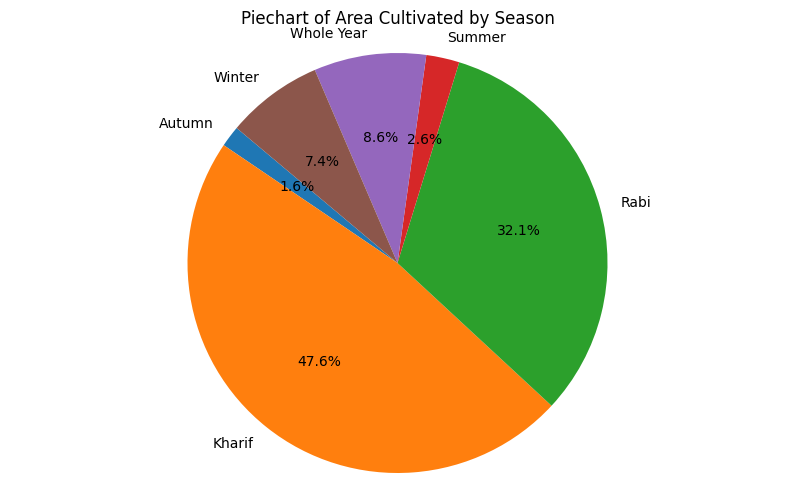

In [33]:
plt.figure(figsize=(10, 6))
plt.pie(seasonal_data['Area'], labels=seasonal_data['Season'], autopct='%1.1f%%', startangle=140)
plt.title('Piechart of Area Cultivated by Season')
plt.axis('equal')
plt.show()

In [34]:
seasonal_data.sort_values(by='Production', ascending=False)

,Season,Area,Production,Yield_Per_Unit_Area
4,Whole Year,2.546494e+08,1.344248e+11,9.650752e+06
1,Kharif,1.403367e+09,4.029970e+09,2.168534e+05
2,Rabi,9.479091e+08,2.051688e+09,1.344409e+05
5,Winter,2.195979e+08,4.345498e+08,3.701274e+04
3,Summer,7.531411e+07,1.706579e+08,4.162559e+04
0,Autumn,4.806909e+07,6.441377e+07,1.342325e+04


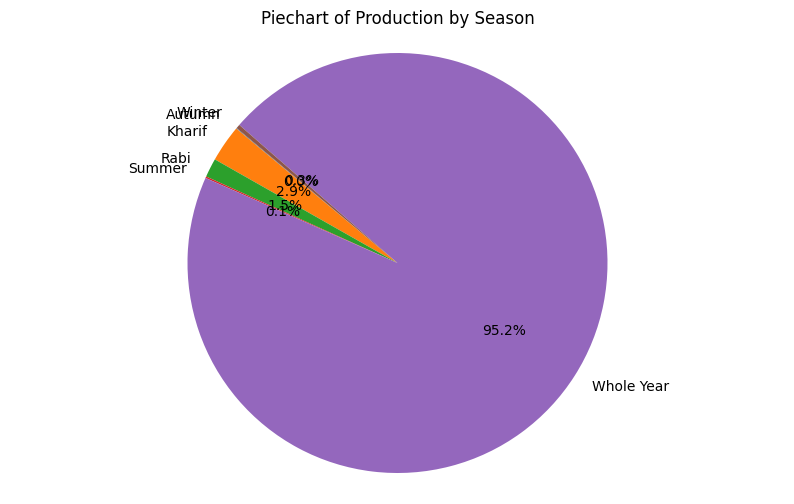

In [35]:
plt.figure(figsize=(10, 6))
plt.pie(seasonal_data['Production'], labels=seasonal_data['Season'], autopct='%1.1f%%', startangle=140)
plt.title('Piechart of Production by Season')
plt.axis('equal')
plt.show()

In [36]:
seasonal_data.sort_values(by='Yield_Per_Unit_Area', ascending=False)

,Season,Area,Production,Yield_Per_Unit_Area
4,Whole Year,2.546494e+08,1.344248e+11,9.650752e+06
1,Kharif,1.403367e+09,4.029970e+09,2.168534e+05
2,Rabi,9.479091e+08,2.051688e+09,1.344409e+05
3,Summer,7.531411e+07,1.706579e+08,4.162559e+04
5,Winter,2.195979e+08,4.345498e+08,3.701274e+04
0,Autumn,4.806909e+07,6.441377e+07,1.342325e+04


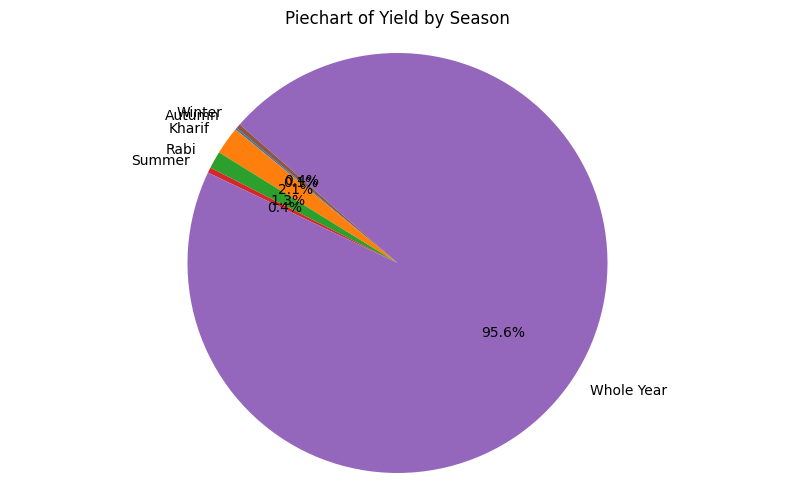

In [37]:
plt.figure(figsize=(10, 6))
plt.pie(seasonal_data['Yield_Per_Unit_Area'], labels=seasonal_data['Season'], autopct='%1.1f%%', startangle=140)
plt.title('Piechart of Yield by Season')
plt.axis('equal')
plt.show()

In [38]:
state_data = data.groupby('State_Name').agg({'Area': 'sum', 'Production': 'sum', 'Yield_Per_Unit_Area': 'sum'}).reset_index()
state_data

,State_Name,Area,Production,Yield_Per_Unit_Area
0,Andaman and Nicobar Islands,3.370834e+05,7.182232e+08,6.905418e+04
1,Andhra Pradesh,1.315073e+08,1.732459e+10,1.865720e+06
2,Arunachal Pradesh,4.364340e+06,6.823913e+06,9.281943e+03
3,Assam,7.037875e+07,2.111752e+09,2.173275e+06
4,Bihar,1.282695e+08,3.664836e+08,6.624423e+04
5,Chandigarh,1.250200e+04,6.395650e+04,6.966819e+02
6,Chhattisgarh,8.293135e+07,1.009519e+08,2.259795e+04
7,Dadra and Nagar Haveli,3.965150e+05,1.847871e+06,1.973514e+03
8,Goa,1.205678e+06,5.057558e+08,4.122624e+04
9,Gujarat,1.549261e+08,5.242913e+08,4.781995e+04


In [39]:
state_data_area_sorted = state_data.sort_values(by='Area', ascending=False)
state_data_area_sorted

,State_Name,Area,Production,Yield_Per_Unit_Area
30,Uttar Pradesh,4.336223e+08,3.234493e+09,1.753920e+05
16,Madhya Pradesh,3.297913e+08,4.488407e+08,6.923741e+04
17,Maharashtra,3.221860e+08,1.263641e+09,5.457769e+04
25,Rajasthan,2.687882e+08,2.813203e+08,3.428519e+04
32,West Bengal,2.154030e+08,1.397904e+09,5.118542e+05
14,Karnataka,2.029086e+08,8.634298e+08,9.340514e+04
9,Gujarat,1.549261e+08,5.242913e+08,4.781995e+04
1,Andhra Pradesh,1.315073e+08,1.732459e+10,1.865720e+06
4,Bihar,1.282695e+08,3.664836e+08,6.624423e+04
24,Punjab,1.267152e+08,5.863850e+08,1.086707e+06


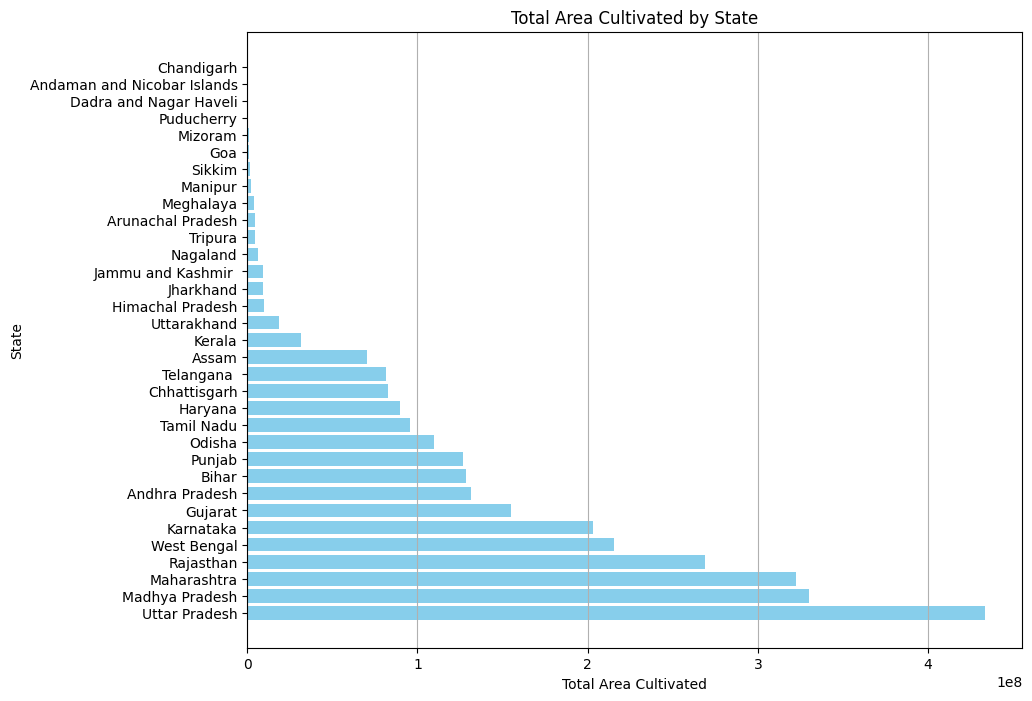

In [40]:
plt.figure(figsize=(10, 8))
plt.barh(state_data_area_sorted['State_Name'], state_data_area_sorted['Area'], color='skyblue')
plt.xlabel('Total Area Cultivated')
plt.ylabel('State')
plt.title('Total Area Cultivated by State')
plt.grid(axis='x')
plt.show()

In [41]:
state_data_production_sorted = state_data.sort_values(by='Production', ascending=False)
state_data_production_sorted

,State_Name,Area,Production,Yield_Per_Unit_Area
15,Kerala,3.180225e+07,9.788005e+10,1.526233e+06
1,Andhra Pradesh,1.315073e+08,1.732459e+10,1.865720e+06
27,Tamil Nadu,9.541695e+07,1.207644e+10,8.661052e+05
30,Uttar Pradesh,4.336223e+08,3.234493e+09,1.753920e+05
3,Assam,7.037875e+07,2.111752e+09,2.173275e+06
32,West Bengal,2.154030e+08,1.397904e+09,5.118542e+05
17,Maharashtra,3.221860e+08,1.263641e+09,5.457769e+04
14,Karnataka,2.029086e+08,8.634298e+08,9.340514e+04
0,Andaman and Nicobar Islands,3.370834e+05,7.182232e+08,6.905418e+04
24,Punjab,1.267152e+08,5.863850e+08,1.086707e+06


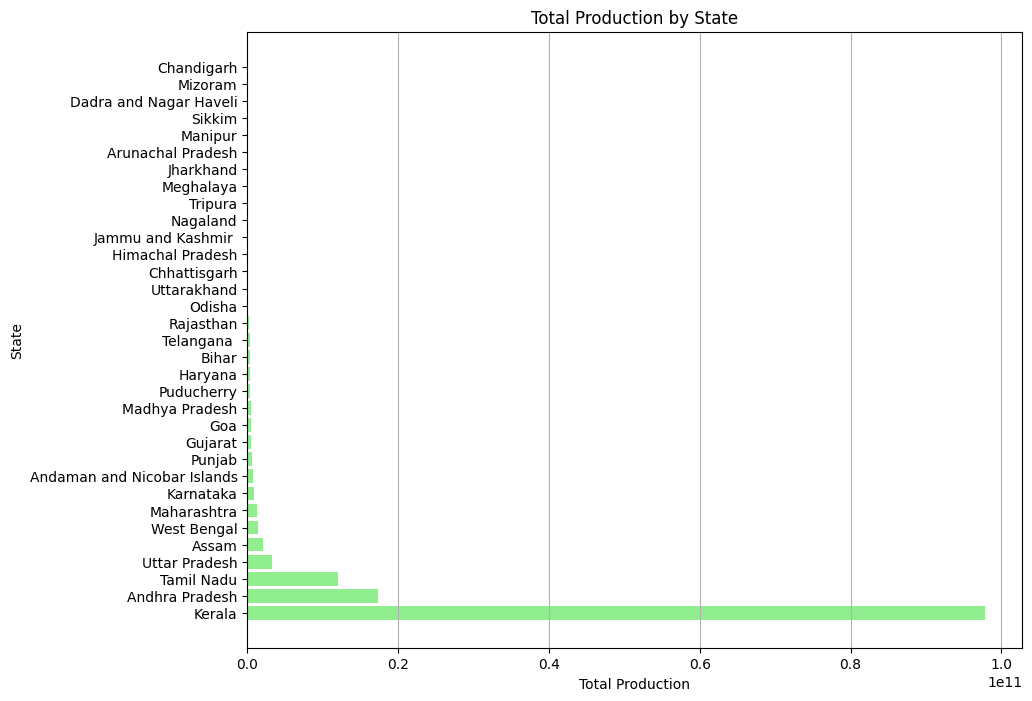

In [42]:
plt.figure(figsize=(10, 8))
plt.barh(state_data_production_sorted['State_Name'], state_data_production_sorted['Production'], color='lightgreen')
plt.xlabel('Total Production')
plt.ylabel('State')
plt.title('Total Production by State')
plt.grid(axis='x')
plt.show()

In [43]:
state_data_yield_sorted = state_data.sort_values(by='Yield_Per_Unit_Area', ascending=False)
state_data_yield_sorted

,State_Name,Area,Production,Yield_Per_Unit_Area
3,Assam,7.037875e+07,2.111752e+09,2.173275e+06
1,Andhra Pradesh,1.315073e+08,1.732459e+10,1.865720e+06
15,Kerala,3.180225e+07,9.788005e+10,1.526233e+06
24,Punjab,1.267152e+08,5.863850e+08,1.086707e+06
27,Tamil Nadu,9.541695e+07,1.207644e+10,8.661052e+05
23,Puducherry,5.487360e+05,3.847245e+08,6.658561e+05
28,Telangana,8.131065e+07,3.351479e+08,5.658708e+05
32,West Bengal,2.154030e+08,1.397904e+09,5.118542e+05
30,Uttar Pradesh,4.336223e+08,3.234493e+09,1.753920e+05
14,Karnataka,2.029086e+08,8.634298e+08,9.340514e+04


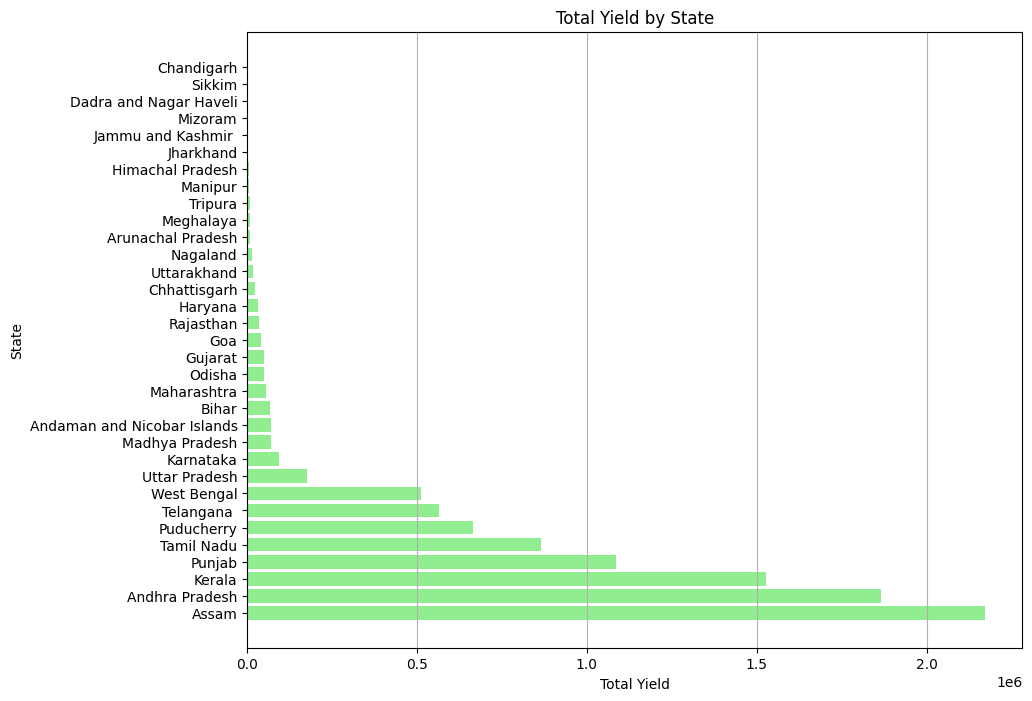

In [44]:
plt.figure(figsize=(10, 8))
plt.barh(state_data_yield_sorted['State_Name'], state_data_yield_sorted['Yield_Per_Unit_Area'], color='lightgreen')
plt.xlabel('Total Yield')
plt.ylabel('State')
plt.title('Total Yield by State')
plt.grid(axis='x')
plt.show()

In [45]:
crop_data = data.groupby('Crop').agg({'Area': 'sum', 'Production': 'sum', 'Yield_Per_Unit_Area': 'sum'}).reset_index()
crop_data

,Crop,Area,Production,Yield_Per_Unit_Area
0,Apple,9.000000e+00,0.000000e+00,0.000000
1,Arcanut (Processed),1.441160e+05,1.928310e+05,25.696756
2,Arecanut,6.000993e+06,2.034659e+07,3328.126833
3,Arhar/Tur,5.778833e+07,3.933139e+07,5961.682686
4,Ash Gourd,1.644000e+03,0.000000e+00,0.000000
...,...,...,...,...
119,Wheat,4.707132e+08,1.332826e+09,16482.970512
120,Yam,1.775000e+03,0.000000e+00,0.000000
121,other fibres,1.263800e+04,0.000000e+00,0.000000
122,other misc. pulses,3.084300e+04,9.704220e+03,17.037510


In [46]:
crop_data_area_sorted = crop_data.sort_values(by='Area', ascending=False)
crop_data_area_sorted

,Crop,Area,Production,Yield_Per_Unit_Area
95,Rice,7.463186e+08,1.605470e+09,30088.797994
119,Wheat,4.707132e+08,1.332826e+09,16482.970512
33,Cotton(lint),1.565579e+08,2.970000e+08,9041.338339
6,Bajra,1.409679e+08,1.296810e+08,6314.255510
48,Jowar,1.376593e+08,1.145983e+08,7329.591447
...,...,...,...,...
12,Ber,1.180000e+02,0.000000e+00,0.000000
78,Peach,4.200000e+01,0.000000e+00,0.000000
58,Litchi,2.500000e+01,0.000000e+00,0.000000
0,Apple,9.000000e+00,0.000000e+00,0.000000


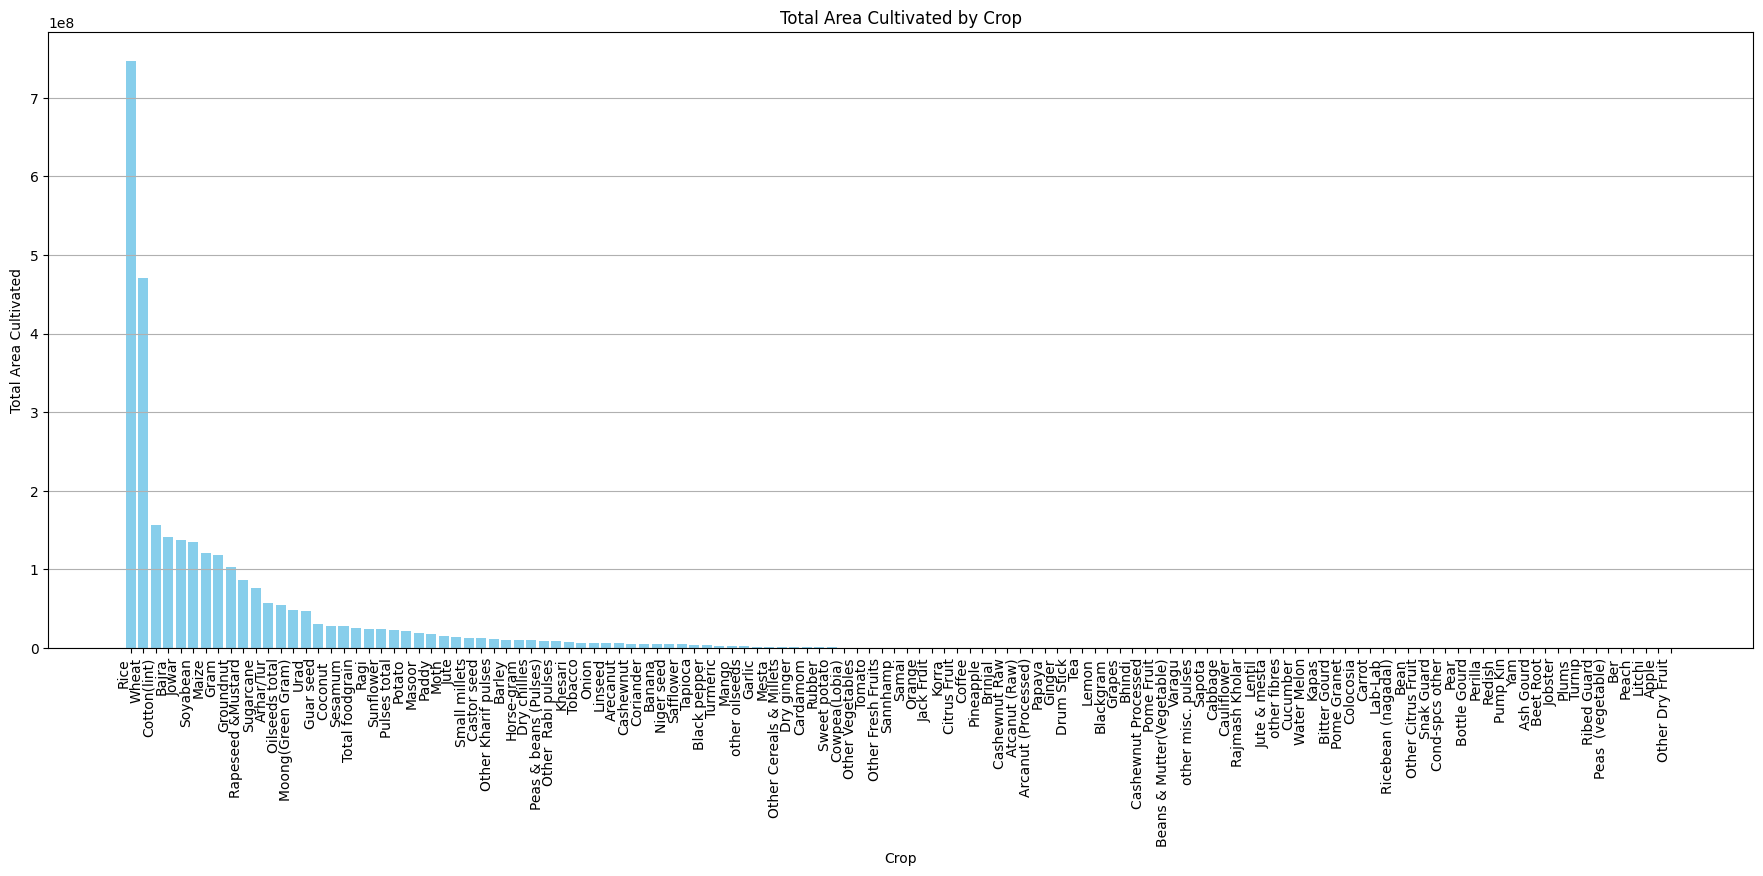

In [47]:
plt.figure(figsize=(22, 8))
plt.bar(crop_data_area_sorted['Crop'], crop_data_area_sorted['Area'], color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Area Cultivated')
plt.title('Total Area Cultivated by Crop')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.show()

In [48]:
crop_data_production_sorted = crop_data.sort_values(by='Production', ascending=False)
crop_data_production_sorted

,Crop,Area,Production,Yield_Per_Unit_Area
28,Coconut,2.833667e+07,1.299816e+11,7.911110e+06
106,Sugarcane,7.665622e+07,5.535682e+09,1.526292e+06
95,Rice,7.463186e+08,1.605470e+09,3.008880e+04
119,Wheat,4.707132e+08,1.332826e+09,1.648297e+04
87,Potato,2.223278e+07,4.248263e+08,8.896261e+04
...,...,...,...,...
71,Other Citrus Fruit,4.255000e+03,0.000000e+00,0.000000e+00
35,Cucumber,1.256900e+04,0.000000e+00,0.000000e+00
58,Litchi,2.500000e+01,0.000000e+00,0.000000e+00
54,Lab-Lab,4.868000e+03,0.000000e+00,0.000000e+00


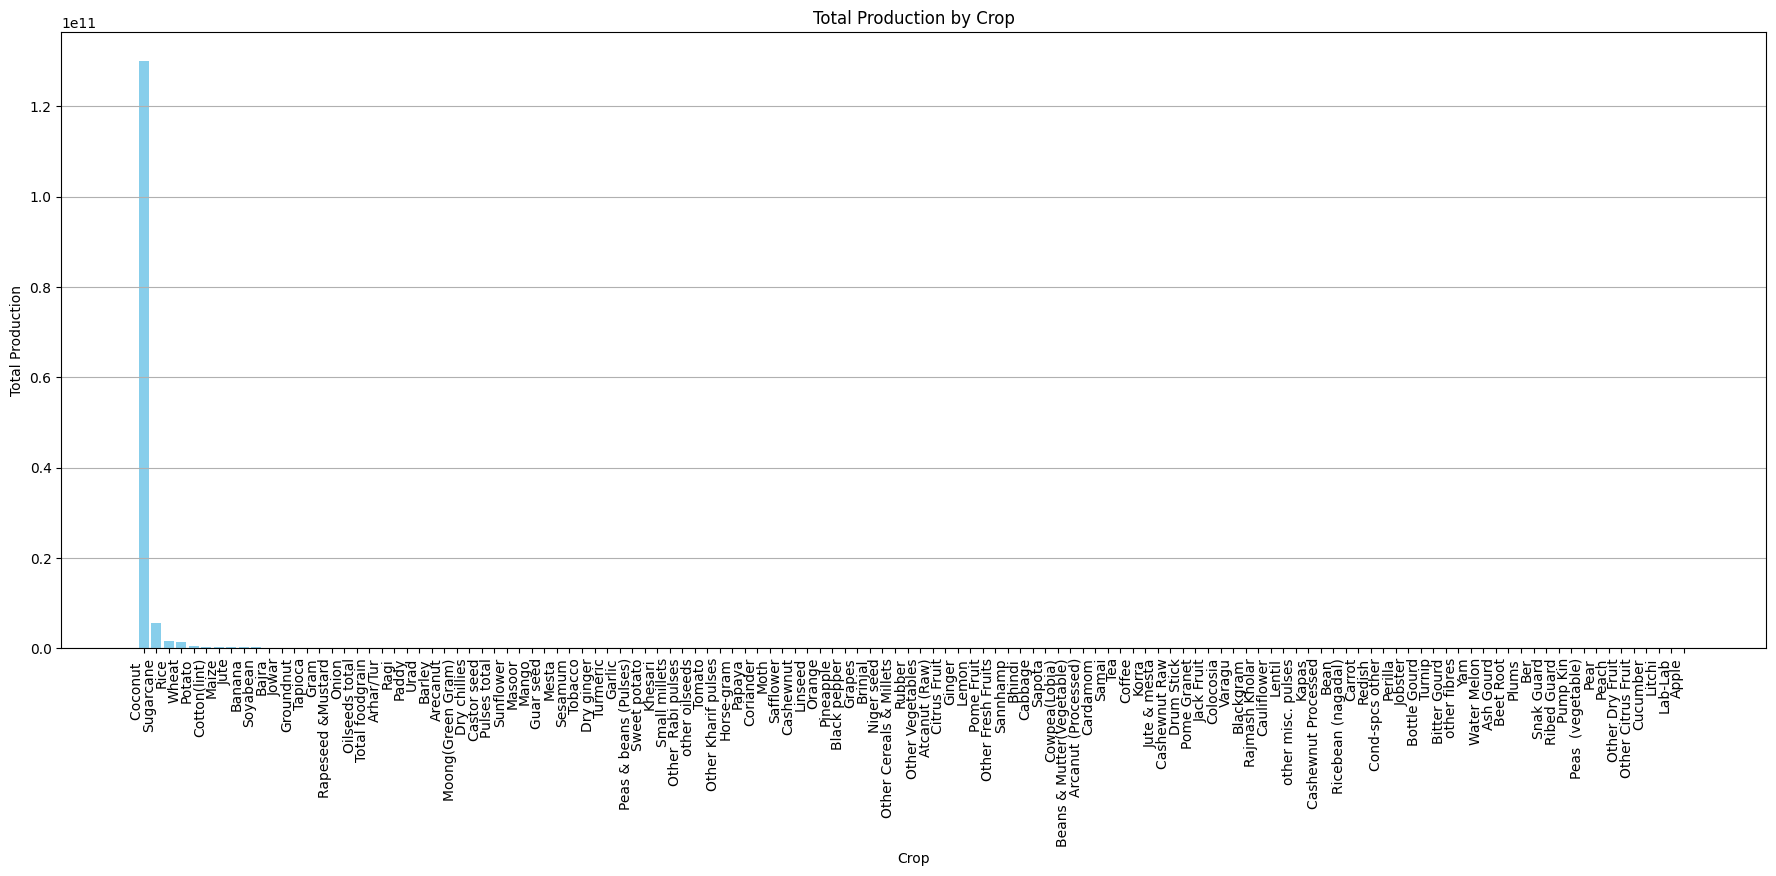

In [49]:
plt.figure(figsize=(22, 8))
plt.bar(crop_data_production_sorted['Crop'], crop_data_production_sorted['Production'], color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Total Production by Crop')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.show()

In [50]:
crop_data_yield_sorted = crop_data.sort_values(by='Yield_Per_Unit_Area', ascending=False)
crop_data_yield_sorted

,Crop,Area,Production,Yield_Per_Unit_Area
28,Coconut,28336669.32,1.299816e+11,7.911110e+06
106,Sugarcane,76656222.75,5.535682e+09,1.526292e+06
87,Potato,22232783.67,4.248263e+08,8.896261e+04
7,Banana,5244768.43,1.461327e+08,8.479388e+04
67,Onion,6305181.97,7.245305e+07,8.279702e+04
...,...,...,...,...
78,Peach,42.00,0.000000e+00,0.000000e+00
72,Other Dry Fruit,7.00,0.000000e+00,0.000000e+00
71,Other Citrus Fruit,4255.00,0.000000e+00,0.000000e+00
54,Lab-Lab,4868.00,0.000000e+00,0.000000e+00


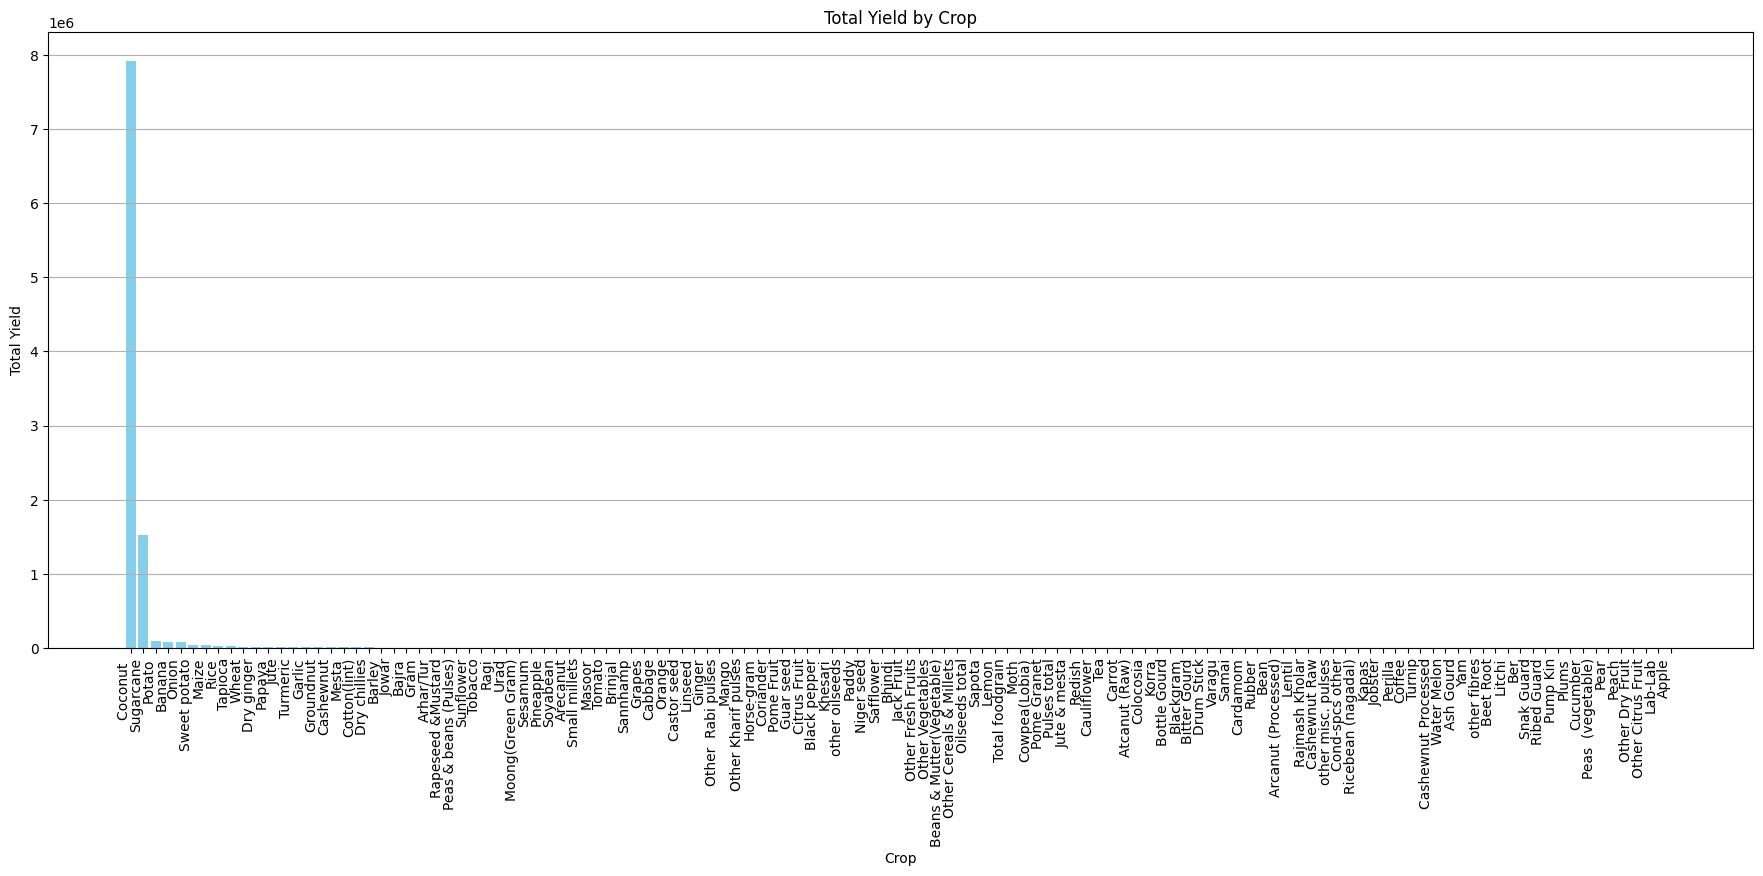

In [51]:
plt.figure(figsize=(22, 8))
plt.bar(crop_data_yield_sorted['Crop'], crop_data_yield_sorted['Yield_Per_Unit_Area'], color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Yield')
plt.title('Total Yield by Crop')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.show()

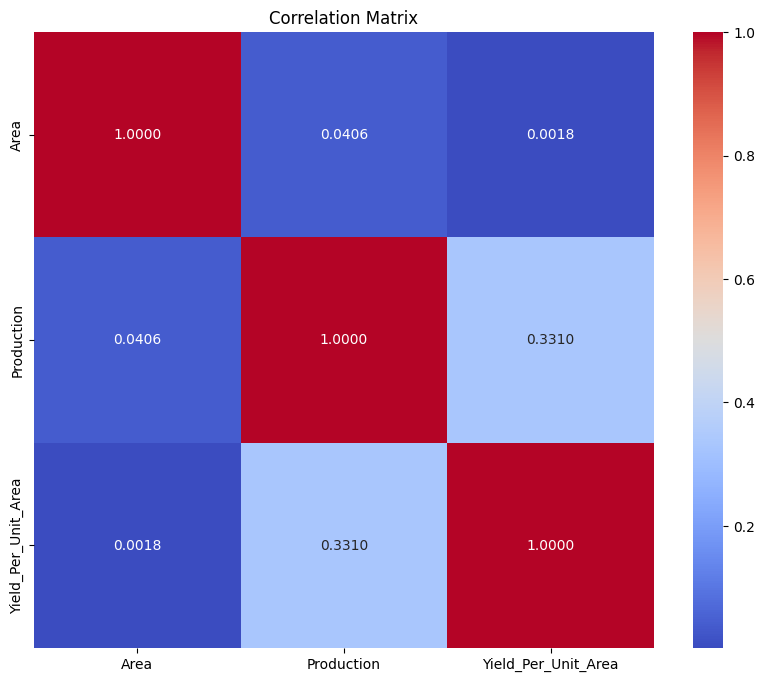

In [52]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Correlation Matrix")
plt.show()

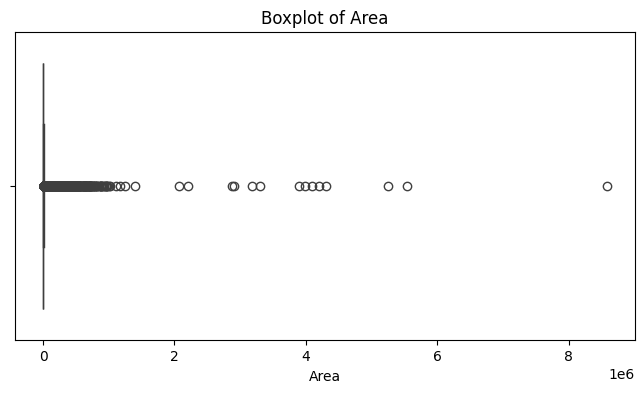

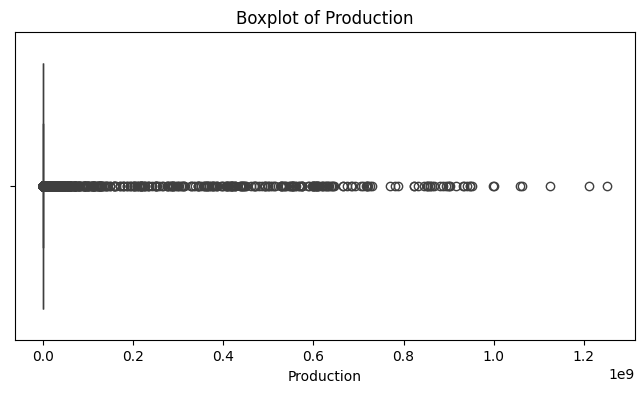

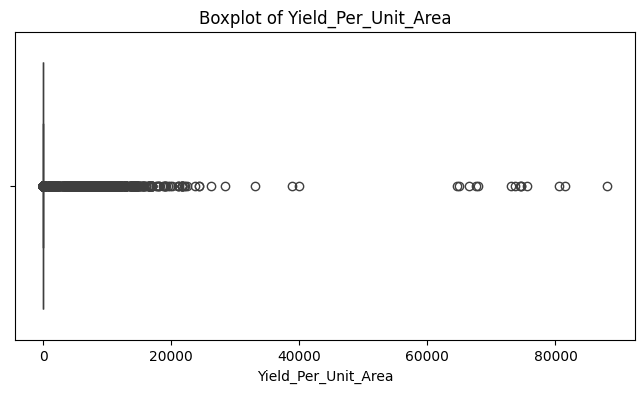

In [53]:
for column in ['Area', 'Production', 'Yield_Per_Unit_Area']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [54]:
skewness_area = data['Area'].skew()
print(f'skewness of area: {skewness_area}')
skewness_production = data['Production'].skew()
print(f'skewness of production: {skewness_production}')
skewness_yield = data['Yield_Per_Unit_Area'].skew()
print(f'skewness of yield: {skewness_yield}')

skewness of area: 47.76912084929028
skewness of production: 40.74153975191237
skewness of yield: 51.6574621872571


In [55]:
data_new = data.copy()

In [56]:
data_new['Area'] = np.log1p(data_new['Area'])
data_new['Production'] = np.log1p(data_new['Production'])
data_new['Yield_Per_Unit_Area'] = np.log1p(data_new['Yield_Per_Unit_Area'])

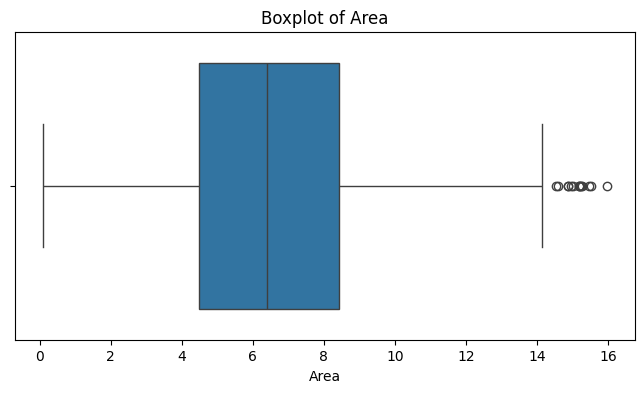

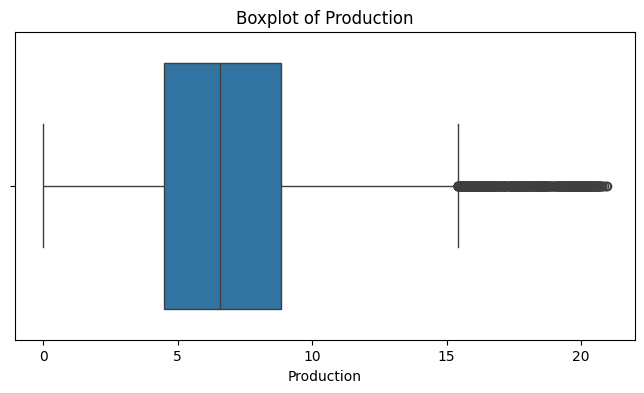

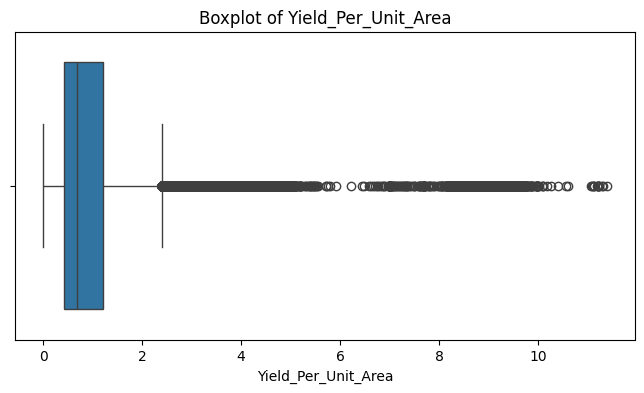

In [57]:
for column in ['Area', 'Production', 'Yield_Per_Unit_Area']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_new, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [58]:
skewness_area = data_new['Area'].skew()
print(f'skewness of new area: {skewness_area}')
skewness_production = data_new['Production'].skew()
print(f'skewness of new production: {skewness_production}')
skewness_yield = data_new['Yield_Per_Unit_Area'].skew()
print(f'skewness of new yield: {skewness_yield}')

skewness of new area: 0.02696470896410544
skewness of new production: 0.1752854739769593
skewness of new yield: 2.978986048059133


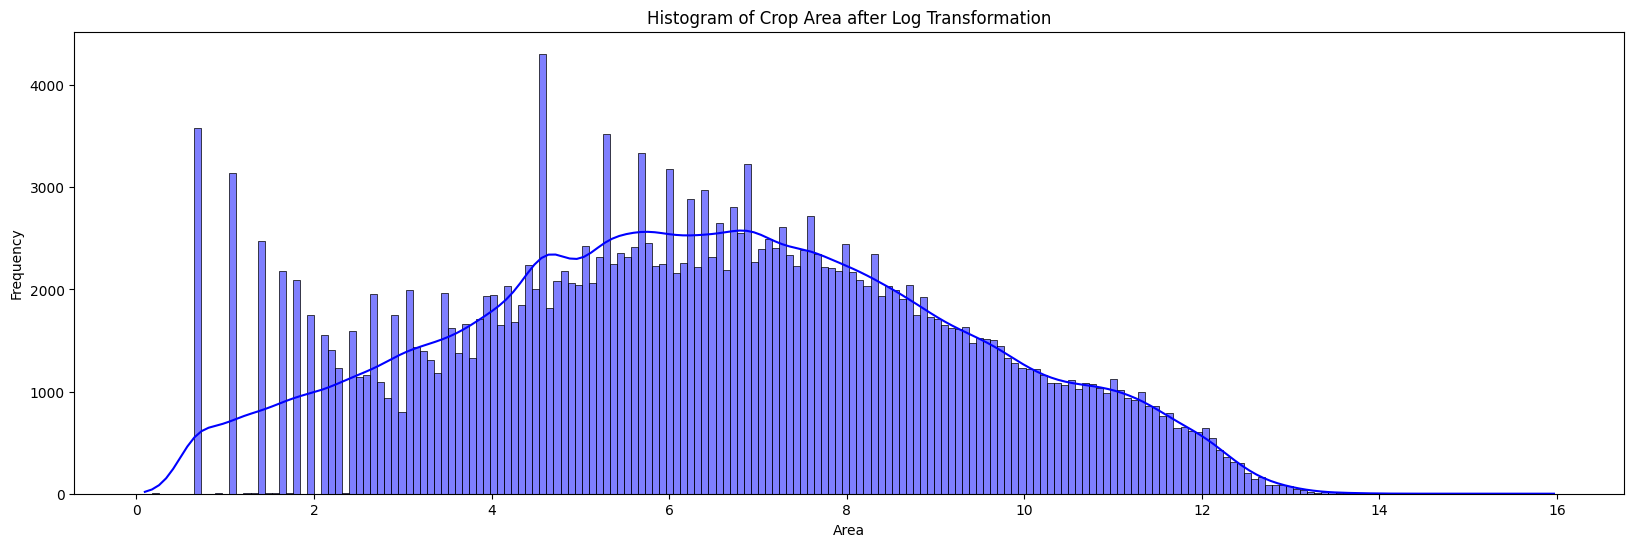

In [59]:
plt.figure(figsize=(20, 6))
sns.histplot(data_new['Area'], bins=200, kde=True, color='blue')
plt.title("Histogram of Crop Area after Log Transformation")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

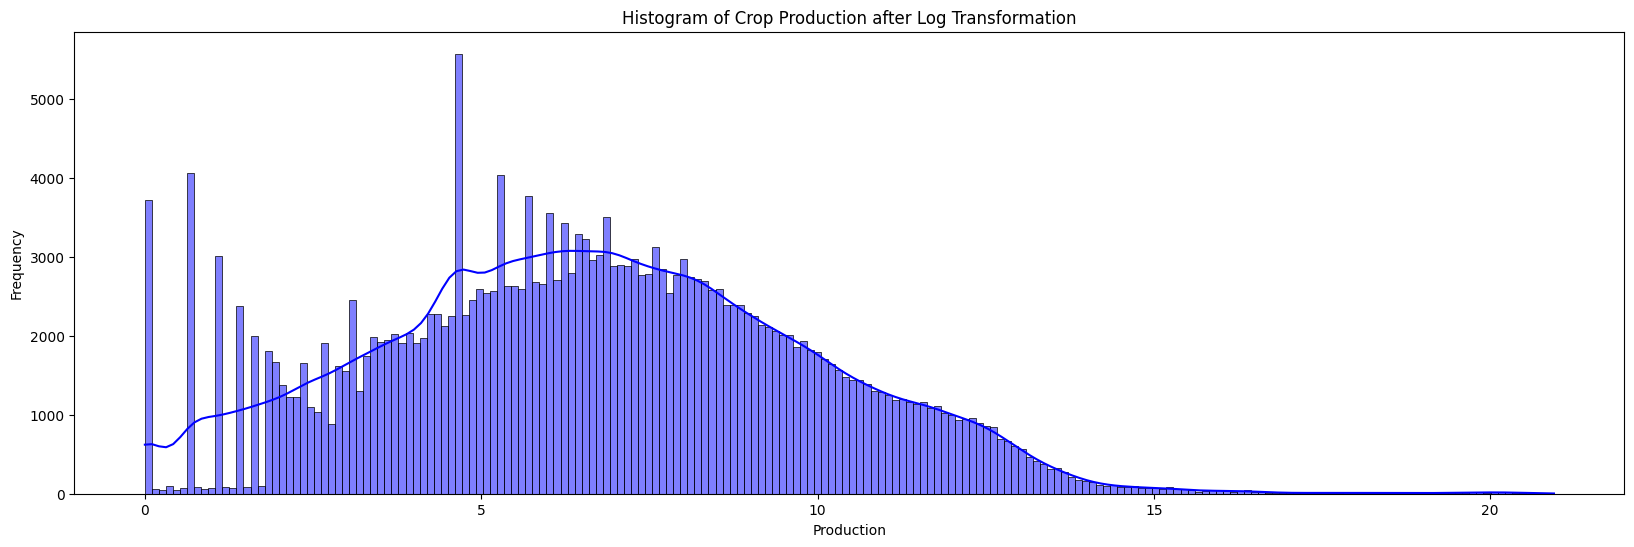

In [60]:
plt.figure(figsize=(20, 6))
sns.histplot(data_new['Production'], bins=200, kde=True, color='blue')
plt.title("Histogram of Crop Production after Log Transformation")
plt.xlabel("Production")
plt.ylabel("Frequency")
plt.show()

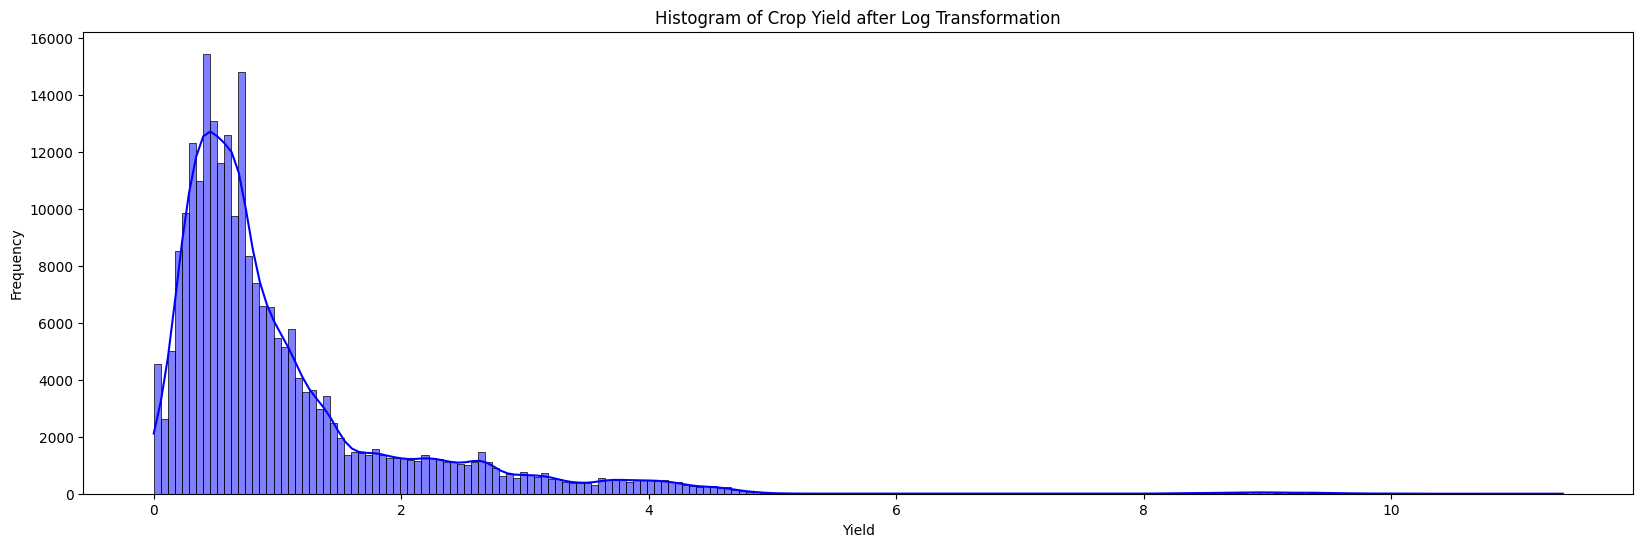

In [61]:
plt.figure(figsize=(20, 6))
sns.histplot(data_new['Yield_Per_Unit_Area'], bins=200, kde=True, color='blue')
plt.title("Histogram of Crop Yield after Log Transformation")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

In [62]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   State_Name           242361 non-null  object        
 1   District_Name        242361 non-null  object        
 2   Crop_Year            242361 non-null  datetime64[ns]
 3   Season               242361 non-null  object        
 4   Crop                 242361 non-null  object        
 5   Area                 242361 non-null  float64       
 6   Production           242361 non-null  float64       
 7   Yield_Per_Unit_Area  242361 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 16.6+ MB


In [63]:
data_new = data_new.drop(columns=['State_Name', 'Crop_Year'])

In [64]:
categorical_variables = [column for column in data_new.columns if data_new[column].dtype == 'O']
categorical_variables

['District_Name', 'Season', 'Crop']

In [65]:
data_new['District_Name'].nunique()

646

In [66]:
numerical_variables = [column for column in data_new.columns if data_new[column].dtype != 'O']
numerical_variables

['Area', 'Production', 'Yield_Per_Unit_Area']

In [67]:
column_encoders = {}
for col in categorical_variables:
  column_encoders[col] = LabelEncoder()
  data_new[col] = column_encoders[col].fit_transform(data_new[col])

data_new.head()

,District_Name,Season,Crop,Area,Production,Yield_Per_Unit_Area
0,427,1,2,7.134891,7.601402,0.953547
1,427,1,74,1.098612,0.693147,0.405465
2,427,1,95,4.634729,5.774552,1.422399
3,427,4,7,5.176150,6.464588,1.535155
4,427,4,22,6.580639,5.111988,0.206336


In [68]:
X= data_new.drop('Yield_Per_Unit_Area',axis=1)
y= data_new['Yield_Per_Unit_Area']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (193888, 5)
Testing data shape: (48473, 5)


In [70]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [71]:
for col in ['Area', 'Production', 'Yield_Per_Unit_Area']:
  mean = train_data[col].mean()
  std = train_data[col].std()
  zscores = (train_data[col] - mean) / std
  outliers = train_data[col][abs(zscores) > 3]
  print(f"{col} outliers (z-score absolute value > {3}):")
  print(outliers)
  print(f"Number of outliers: {len(outliers)}\n")

Area outliers (z-score absolute value > 3):
241314    15.010857
236486    15.251975
244891    15.225253
243301    14.880670
242757    14.872572
244878    15.964956
243654    15.473967
240719    15.174922
Name: Area, dtype: float64
Number of outliers: 8

Production outliers (z-score absolute value > 3):
182410    18.993354
98430     19.745100
7829      17.910138
98088     19.558514
98987     20.141660
            ...    
1110      16.661330
130883    16.435756
205796    16.452329
100537    20.617905
98379     19.555303
Name: Production, Length: 448, dtype: float64
Number of outliers: 448

Yield_Per_Unit_Area outliers (z-score absolute value > 3):
194356    4.473911
182410    9.653630
236684    4.301718
64918     4.325742
7575      4.699874
            ...   
94649     4.523960
182025    4.221450
79427     4.503138
77324     4.649665
77991     4.583948
Name: Yield_Per_Unit_Area, Length: 3300, dtype: float64
Number of outliers: 3300



In [72]:
for col in ['Area', 'Production', 'Yield_Per_Unit_Area']:
  mean = train_data[col].mean()
  std = train_data[col].std()
  zscores = (test_data[col] - mean) / std
  outliers = test_data[col][abs(zscores) > 3]
  print(f"{col} outliers (z-score absolute value > {3}):")
  print(outliers)
  print(f"Number of outliers: {len(outliers)}\n")

Area outliers (z-score absolute value > 3):
237381    14.972361
244290    15.528227
238007    15.199102
244305    15.275799
Name: Area, dtype: float64
Number of outliers: 4

Production outliers (z-score absolute value > 3):
99992     19.123778
8669      17.350616
100931    19.860516
161140    16.808740
101486    20.130869
            ...    
9250      16.468048
4404      16.870470
19984     16.737489
23887     17.548072
100197    20.604482
Name: Production, Length: 102, dtype: float64
Number of outliers: 102

Yield_Per_Unit_Area outliers (z-score absolute value > 3):
99992     8.627033
4932      4.878598
95213     4.883559
78088     4.471086
2805      4.283216
            ...   
14600     9.146317
222822    4.198885
186107    4.615121
161243    9.617037
240337    4.322476
Name: Yield_Per_Unit_Area, Length: 820, dtype: float64
Number of outliers: 820



In [73]:
for col in ['Area', 'Production', 'Yield_Per_Unit_Area']:
  lower_bound = train_data[col].quantile(0.05)
  upper_bound = train_data[col].quantile(1 - 0.05)

  train_data.loc[train_data[col] < lower_bound, col] = lower_bound
  train_data.loc[train_data[col] > upper_bound, col] = upper_bound

  test_data.loc[test_data[col] < lower_bound, col] = lower_bound
  test_data.loc[test_data[col] > upper_bound, col] = upper_bound

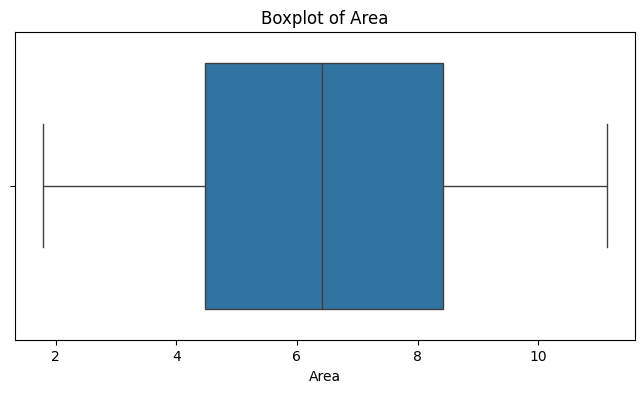

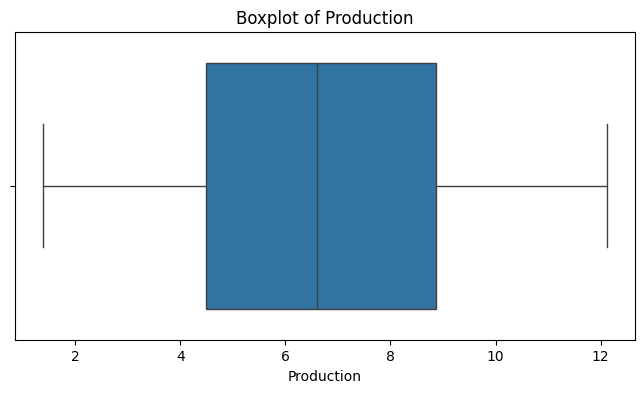

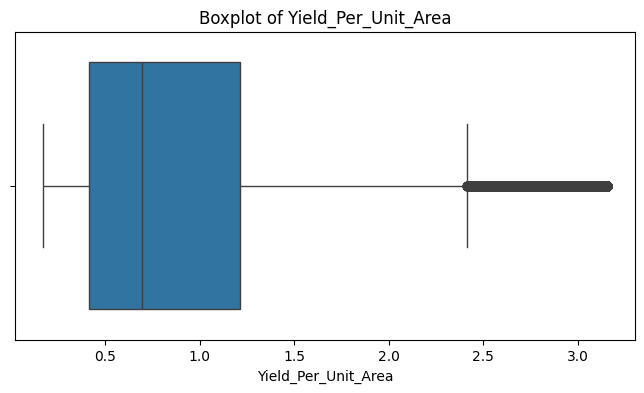

In [74]:
for column in ['Area', 'Production', 'Yield_Per_Unit_Area']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [75]:
skewness_area = train_data['Area'].skew()
print(f'skewness of final area: {skewness_area}')
skewness_production = train_data['Production'].skew()
print(f'skewness of final production: {skewness_production}')
skewness_yield = train_data['Yield_Per_Unit_Area'].skew()
print(f'skewness of final yield: {skewness_yield}')

skewness of final area: 0.016339843157015865
skewness of final production: 0.04618133735597235
skewness of final yield: 1.4346032757471696


In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
print(X_train)

[[-0.00232969  0.64405222  1.39305114 -0.5001909  -0.68123635]
 [-1.2244188   1.42126015 -0.86710812 -0.15869623  0.11896142]
 [ 1.67337329 -0.91036363 -0.60293366  0.32536745 -0.13623432]
 ...
 [-1.00561682 -0.91036363 -0.60293366  1.17923732  0.90134235]
 [-0.02367622 -0.91036363  1.12887668 -1.11985206 -1.10225062]
 [ 1.15571983 -0.91036363  1.07017125 -0.48214911 -0.76043032]]


The R2 score of the  Linear Regression Model is 0.8788


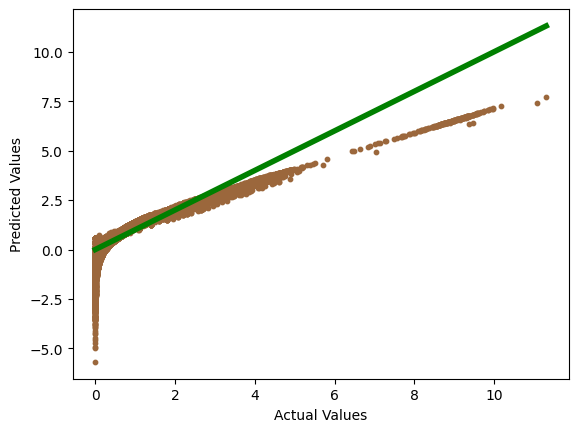

The R2 score of the  Random Forest Model is 0.9996


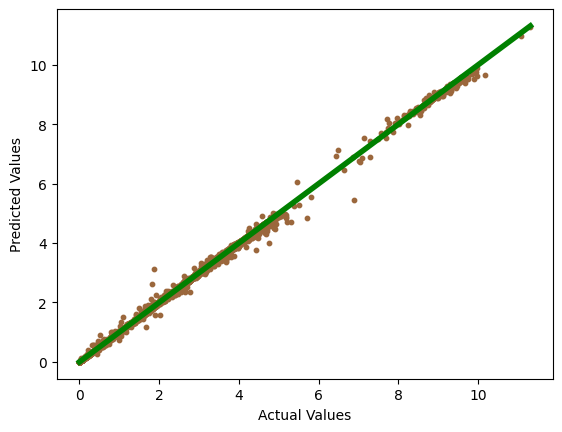

The R2 score of the  Gradient Boost Model is 0.9830


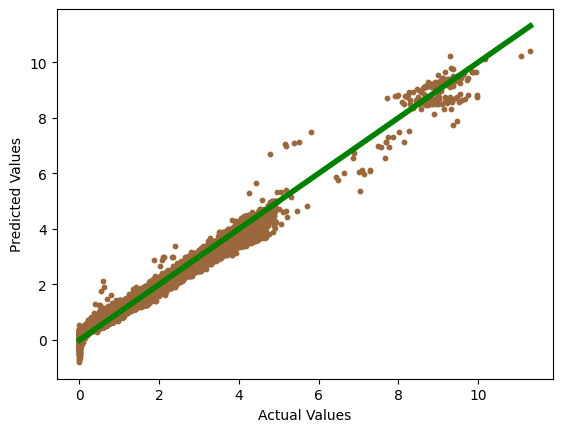

The R2 score of the  XGBoost Model is 0.9966


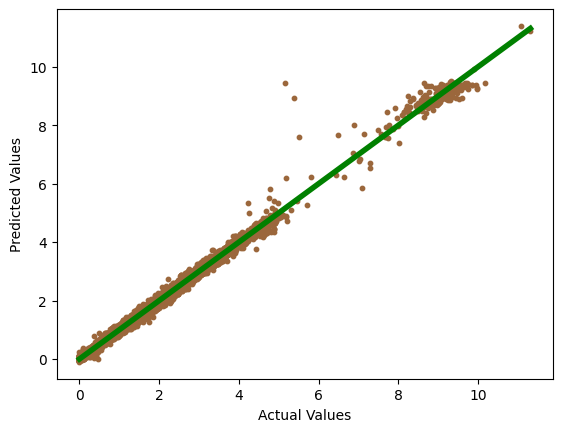

The R2 score of the  KNN Model is 0.9880


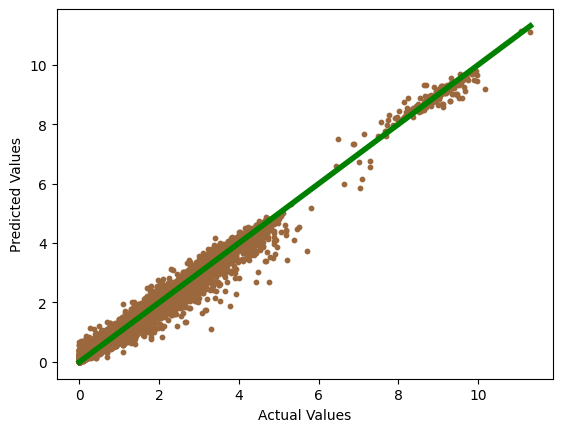

The R2 score of the  Decision Tree Model is 0.9986


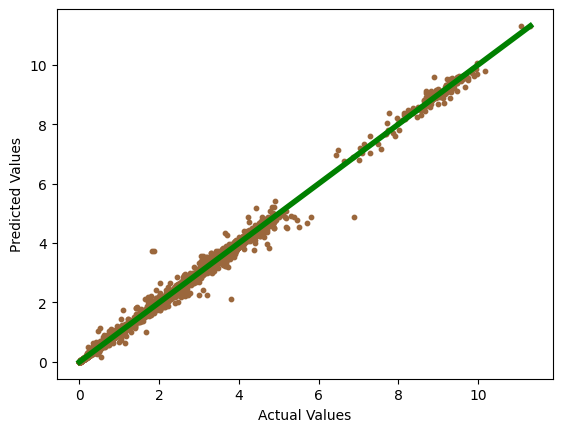

The R2 score of the  Bagging Regressor Model is 0.9996


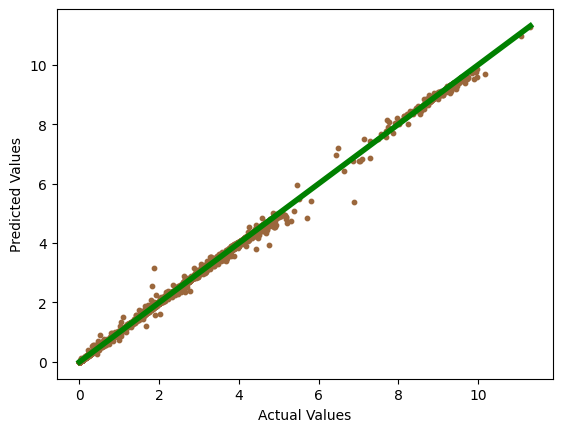

The R2 score of the  Voting Regressor Model is 0.9992


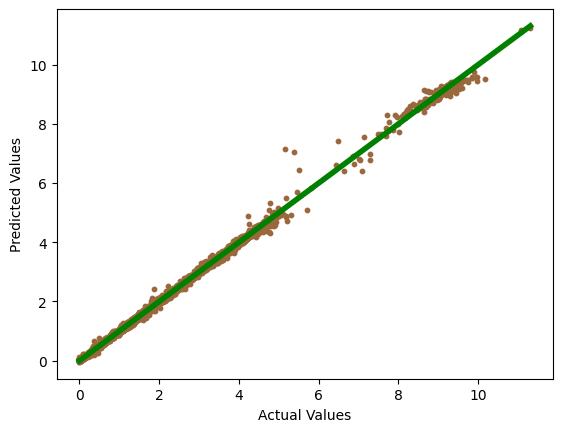

In [81]:
results1 = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42)),
    ('Voting Regressor', VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=150, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=150, random_state=42))
]))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    print(f'The R2 score of the  {name} Model is {R2_score:.4f}')
    # cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    # print(f'Cross-validated R2 scores: {cv_scores}')
    # print(f'Mean cross-validated R2 score: {cv_scores.mean():.4f}')
    results1.append((name, MSE, MAE, R2_score))

    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

In [82]:
df1 = pd.DataFrame(results1, columns=['Model', 'MSE', 'MAE', 'R2_score'])
df_styled_best = df1.style.highlight_max(subset=['R2_score'], color='green').highlight_min(subset=['MSE', 'MAE'], color='green').highlight_max(subset=['MSE', 'MAE'], color='red').highlight_min(subset=['R2_score'], color='red')
display(df_styled_best)

,Model,MSE,MAE,R2_score
0,Linear Regression,0.130688,0.208882,0.878832
1,Random Forest,0.000459,0.005220,0.999574
2,Gradient Boost,0.018300,0.097488,0.983033
3,XGBoost,0.003622,0.032986,0.996642
4,KNN,0.012911,0.066930,0.988029
5,Decision Tree,0.001462,0.012604,0.998644
6,Bagging Regressor,0.000448,0.005090,0.999584
7,Voting Regressor,0.000863,0.014185,0.999200


Epoch 1/100
4848/4848 [==============================] - 20s 4ms/step - loss: 0.1614 - val_loss: 0.5094 - lr: 0.0010
Epoch 2/100
4848/4848 [==============================] - 18s 4ms/step - loss: 0.0444 - val_loss: 0.3300 - lr: 0.0010
Epoch 3/100
4848/4848 [==============================] - 18s 4ms/step - loss: 0.0314 - val_loss: 0.7979 - lr: 0.0010
Epoch 4/100
4848/4848 [==============================] - 16s 3ms/step - loss: 0.0268 - val_loss: 0.9390 - lr: 0.0010
Epoch 5/100
4848/4848 [==============================] - 17s 4ms/step - loss: 0.0243 - val_loss: 0.7234 - lr: 0.0010
Epoch 6/100
4848/4848 [==============================] - 17s 4ms/step - loss: 0.0231 - val_loss: 0.9485 - lr: 0.0010
Epoch 7/100
4830/4848 [============================>.] - ETA: 0s - loss: 0.0221
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
4848/4848 [==============================] - 17s 3ms/step - loss: 0.0221 - val_loss: 0.5339 - lr: 0.0010
Epoch 8/100
4848/4848 [==============

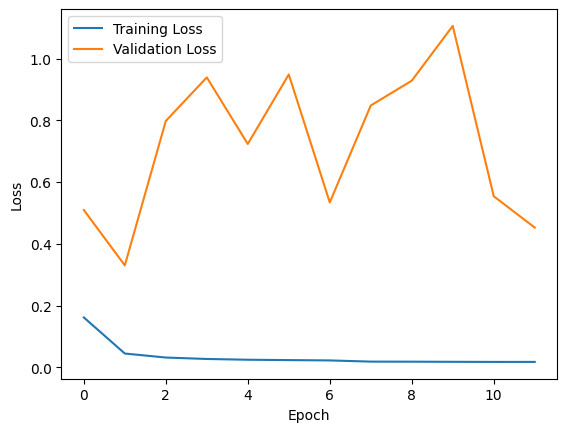

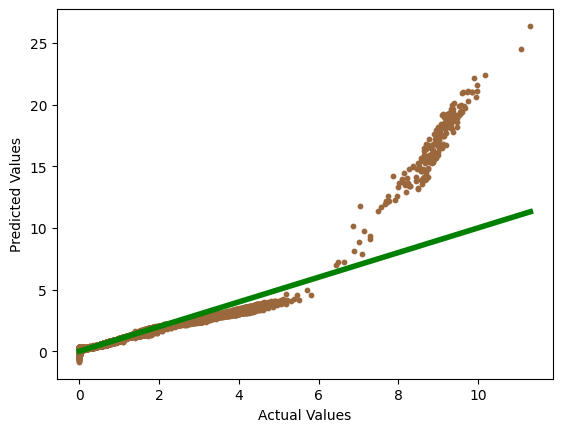

6059/6059 [==============================] - 12s 2ms/step - loss: 0.2913
The Training Loss of the DNN Regressor Model is 0.29
1515/1515 [==============================] - 2s 2ms/step - loss: 0.3064
The Testing Loss of the DNN Regressor Model is 0.31
The R2 score of the DNN Regressor Model is 0.72


In [83]:
results2 = []

def dnn_model():
  model = Sequential([
      layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
      layers.Dropout(0.2),
      layers.BatchNormalization(),
      layers.Dense(32, activation='relu'),
      layers.Dropout(0.2),
      layers.BatchNormalization(),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mse', optimizer='adam')
  return model

dl_models = [
  ('DNN Regressor', dnn_model())
  ]

for name, model in dl_models:
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
  lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping, lr_scheduler])
  y_pred = model.predict(X_test)
  MSE = mean_squared_error(y_test, y_pred)
  R2_score = r2_score(y_test, y_pred)
  MAE = mean_absolute_error(y_test, y_pred)
  results2.append((name, MSE, MAE, R2_score))

  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.scatter(y_test, y_pred,s=10,color='#9B673C')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
  plt.show()

  train_loss = model.evaluate(X_train, y_train)
  print(f'The Training Loss of the {name} Model is {train_loss:.2f}')
  test_loss = model.evaluate(X_test, y_test)
  print(f'The Testing Loss of the {name} Model is {test_loss:.2f}')
  print(f'The R2 score of the {name} Model is {R2_score:.2f}')

In [84]:
df2 = pd.DataFrame(results2, columns=['Model', 'MSE', 'MAE', 'R2_score'])
df2

,Model,MSE,MAE,R2_score
0,DNN Regressor,0.30641,0.125651,0.71591


In [85]:
import joblib

joblib.dump(column_encoders, 'label_encoder.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [86]:
bagging_regressor = BaggingRegressor(n_estimators=150, random_state=42)

bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print(f'The R2 score of the Bagging Regressor Model is {R2_score:.4f}')
# cv_scores = cross_val_score(bagging_regressor, X_train, y_train, cv=5, scoring='r2')
# print(f'Cross-validated R2 scores: {cv_scores}')
# print(f'Mean cross-validated R2 score: {cv_scores.mean():.4f}')

The R2 score of the Bagging Regressor Model is 0.9996


In [87]:
joblib.dump(bagging_regressor, 'voting_regressor.pkl')

['voting_regressor.pkl']

In [88]:
# # Load the Label Encoder
# label_encoder = joblib.load('/content/drive/MyDrive/Farmoid/label_encoder.pkl')

# # Load the Standard Scaler
# scaler = joblib.load('/content/drive/MyDrive/Farmoid/scaler.pkl')

# # Load the best model (Voting Regressor)
# voting_regressor = joblib.load('/content/drive/MyDrive/Farmoid/voting_regressor.pkl')

# # Define new data
# new_data = pd.DataFrame({
#     'District_Name': ['NICOBARS'],
#     'Season': ['Kharif'],
#     'Crop': ['Arecanut'],
#     'Area': [1254.0],
#     'Production': [2000.0]
# })

# # Preprocess the new data
# new_data['Season'] = new_data['Season'].str.strip()

# # Apply log transformation
# new_data['Area'] = np.log1p(new_data['Area'])
# new_data['Production'] = np.log1p(new_data['Production'])

# # Encode categorical variables
# for col in ['District_Name', 'Season', 'Crop']:
#   new_data[col] = label_encoder[col].transform(new_data[col])

# # Prepare input data
# # input_data = np.array([[data['State_Name'], data['District_Name'], data['Crop_Year'], data['Season'], data['Crop'], data['Area']]])
# new_data = scaler.transform(new_data)

# # Predict the crop yield
# predicted_yield_log = voting_regressor.predict(new_data)

# # Transform back from log scale to original scale
# predicted_yield = np.expm1(predicted_yield_log)
# print(f'Predicted Crop Yield: {predicted_yield[0]}')

In [89]:

# for col in ['State_Name', 'District_Name', 'Season', 'Crop']:
#             data[feature] = label_encoders[feature].transform([data[feature]])[0]
# categorical_variables = ['State_Name', 'District_Name', 'Season', 'Crop']
# le = LabelEncoder()

# # Fit the label encoder on the entire original data to maintain consistency
# for col in categorical_variables:
#     le.fit(data[col])  # Assuming 'data' is your original transformed training data
#     new_data[col] = le.transform(new_data[col])

In [90]:
# param_grid_xgb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 6, 9],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }
# grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)
# print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
# print(f"Best score: {grid_search_xgb.best_score_}")

In [91]:
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
# grid_search_rf.fit(X_train, y_train)
# print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
# print(f"Best score: {grid_search_rf.best_score_}")